In [1]:
import sys
print(sys.executable)

C:\Users\MSI\Desktop\Artificial Intelligence Engineering\aie-group-3\.venv\Scripts\python.exe


In [2]:
#2.3.1. Загрузка данных и первичный анализ
# 1. Импорты
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns  # опционально, но полезно для EDA

# Модели и инструменты sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
from sklearn.inspection import permutation_importance

# Сохранение моделей
import joblib

# Фиксируем случайность
RANDOM_STATE = 42

# Настройка графиков (опционально, но красиво)
plt.rcParams.update({'font.size': 12})

In [3]:
# 2. Загрузка данных
df = pd.read_csv("../../seminars/S06/S06-hw-dataset-01.csv")


Первые 5 строк:


,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-nul

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


Количество объектов по классам:
target
0    8119
1    3881
Name: count, dtype: int64

Доли классов:
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64
Пропуски (NaN) в данных:
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

Типы данных по столбцам:
id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float6

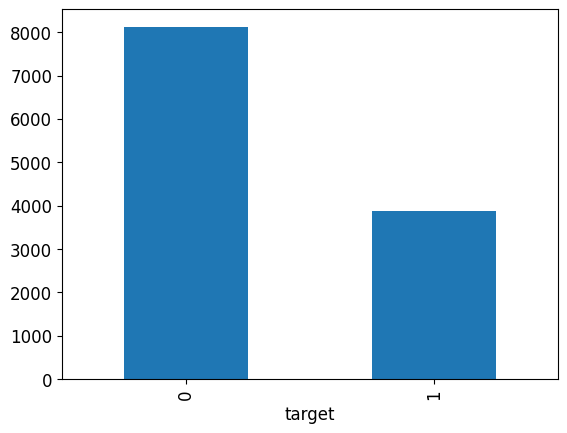

In [4]:
# 3. Первичный анализ данных 
print("Первые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nОписательные статистики:")
display(df.describe())

# Сколько объектов каждого класса?
print("Количество объектов по классам:")
print(df["target"].value_counts())

# Доли (в процентах):
print("\nДоли классов:")
print(df["target"].value_counts(normalize=True))

# Доли (в процентах) визуализация:
df["target"].value_counts().plot(kind='bar')


# Проверка пропусков
print("Пропуски (NaN) в данных:")
print(df.isnull().sum())

# Типы столбцов
print("\nТипы данных по столбцам:")
print(df.dtypes)

In [5]:
# 4. Подготовка признаков и таргета 
X = df.drop(columns=["id", "target"])
y = df["target"]

In [6]:
# 2.3.2. Train/Test-сплит и воспроизводимость

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print(f"\nРазмеры выборок:")
print(f"  Train: {X_train.shape[0]} объектов")
print(f"  Test:  {X_test.shape[0]} объектов")

print("Фиксированный random_state делает разбиение воспроизводимым. Каждый раз при запуске одинаковые train и test. Это нужно, чтобы результаты экспериментов можно было сравнивать честно. stratify=y сохраняет пропорции классов в train и test. Без этого в test может случайно попасть, например, только один класс")



Размеры выборок:
  Train: 9600 объектов
  Test:  2400 объектов
Фиксированный random_state делает разбиение воспроизводимым. Каждый раз при запуске одинаковые train и test. Это нужно, чтобы результаты экспериментов можно было сравнивать честно. stratify=y сохраняет пропорции классов в train и test. Без этого в test может случайно попасть, например, только один класс


In [7]:
# 2.3.3. Baseline’ы

# Baseline 1: DummyClassifier (most_frequent)
dummy = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print(" DummyClassifier (most_frequent):")
print(f"  Accuracy: {acc_dummy:.4f}")
print(f"  F1:       {f1_dummy:.4f}")
print(f"  ROC-AUC:  {auc_dummy:.4f}\n")

# Baseline 2: Logistic Regression через Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

pipe_lr.fit(X_train, y_train)

y_pred_lr = pipe_lr.predict(X_test)
y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print(" Logistic Regression:")
print(f"  Accuracy: {acc_lr:.4f}")
print(f"  F1:       {f1_lr:.4f}")
print(f"  ROC-AUC:  {auc_lr:.4f}\n")

# Храним результаты для отчёта
results = {}


# Добавляем baseline'ы в общий результат для сохранения в metrics_test.json
results['DummyClassifier'] = {
    'model': dummy,
    'params': {'strategy': 'most_frequent'},
    'acc': acc_dummy,
    'f1': f1_dummy,
    'auc': auc_dummy
}

results['LogisticRegression'] = {
    'model': pipe_lr,
    'params': {'scaler': 'StandardScaler', 'classifier': 'LogisticRegression'},
    'acc': acc_lr,
    'f1': f1_lr,
    'auc': auc_lr
}



 DummyClassifier (most_frequent):
  Accuracy: 0.6767
  F1:       0.0000
  ROC-AUC:  0.5000

 Logistic Regression:
  Accuracy: 0.8275
  F1:       0.7076
  ROC-AUC:  0.8747



In [8]:
# 2.3.4. Модели: деревья и ансамбли



# 1. DecisionTreeClassifier с контролем сложности
print("Подбор гиперпараметров для DecisionTree")

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [10, 20, 50]
}



grid_dt = GridSearchCV(
    DecisionTreeClassifier(
        max_depth=10,
        min_samples_leaf=20,
        random_state=RANDOM_STATE
    ),
    param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

# Оценка на test (один раз)
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

results['DecisionTree'] = {
    'model': best_dt,
    'params': grid_dt.best_params_,
    'acc': acc_dt,
    'f1': f1_dt,
    'auc': auc_dt
}


print(f"   Лучшие параметры: {grid_dt.best_params_}")
print(f"   Accuracy: {acc_dt:.4f}, F1: {f1_dt:.4f}, ROC-AUC: {auc_dt:.4f}\n")


# 2. RandomForestClassifier
#
print(" Подбор гиперпараметров для RandomForest")

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

results['RandomForest'] = {
    'model': best_rf,
    'params': grid_rf.best_params_,
    'acc': acc_rf,
    'f1': f1_rf,
    'auc': auc_rf
}


print(f"   Лучшие параметры: {grid_rf.best_params_}")
print(f"   Accuracy: {acc_rf:.4f}, F1: {f1_rf:.4f}, ROC-AUC: {auc_rf:.4f}\n")


# 3. GradientBoostingClassifier (boosting)

print(" Подбор гиперпараметров для GradientBoosting")

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=RANDOM_STATE),
    param_grid_gb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_proba_gb)

results['GradientBoosting'] = {
    'model': best_gb,
    'params': grid_gb.best_params_,
    'acc': acc_gb,
    'f1': f1_gb,
    'auc': auc_gb
}


print(f"   Лучшие параметры: {grid_gb.best_params_}")
print(f"   Accuracy: {acc_gb:.4f}, F1: {f1_gb:.4f}, ROC-AUC: {auc_gb:.4f}\n")


# Итоговая таблица (для удобства)

print("="*60)
print("СВОДКА МОДЕЛЕЙ:")
print("="*60)
for name, res in results.items():
    print(f"{name:20} | Acc: {res['acc']:.4f} | F1: {res['f1']:.4f} | AUC: {res['auc']:.4f}")
print("="*60)

Подбор гиперпараметров для DecisionTree
   Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 20}
   Accuracy: 0.8683, F1: 0.7879, ROC-AUC: 0.9067

 Подбор гиперпараметров для RandomForest
   Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
   Accuracy: 0.9225, F1: 0.8726, ROC-AUC: 0.9648

 Подбор гиперпараметров для GradientBoosting
   Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
   Accuracy: 0.9267, F1: 0.8834, ROC-AUC: 0.9670

СВОДКА МОДЕЛЕЙ:
DummyClassifier      | Acc: 0.6767 | F1: 0.0000 | AUC: 0.5000
LogisticRegression   | Acc: 0.8275 | F1: 0.7076 | AUC: 0.8747
DecisionTree         | Acc: 0.8683 | F1: 0.7879 | AUC: 0.9067
RandomForest         | Acc: 0.9225 | F1: 0.8726 | AUC: 0.9648
GradientBoosting     | Acc: 0.9267 | F1: 0.8834 | AUC: 0.9670


 Лучшая модель по ROC-AUC: GradientBoosting



<Figure size 700x500 with 0 Axes>

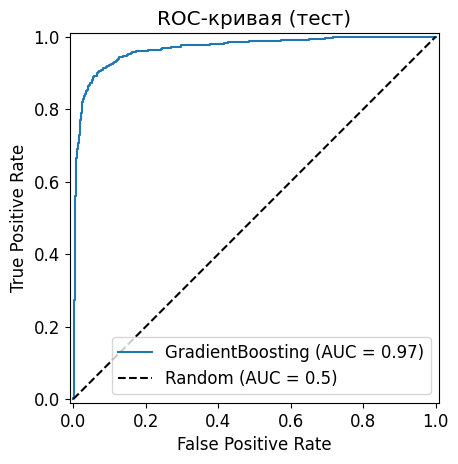

<Figure size 600x500 with 0 Axes>

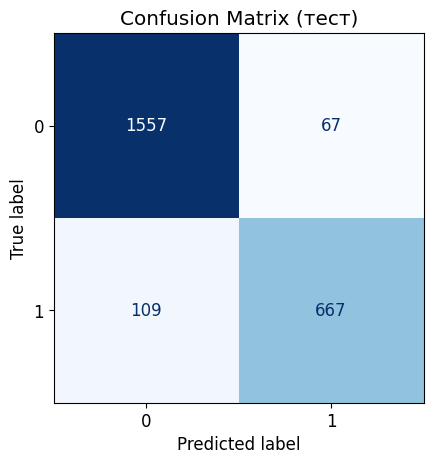

Все метрики на тесте:
--------------------------------------------------
DummyClassifier      | Acc: 0.6767 | F1: 0.0000 | AUC: 0.5000
LogisticRegression   | Acc: 0.8275 | F1: 0.7076 | AUC: 0.8747
DecisionTree         | Acc: 0.8683 | F1: 0.7879 | AUC: 0.9067
RandomForest         | Acc: 0.9225 | F1: 0.8726 | AUC: 0.9648
GradientBoosting     | Acc: 0.9267 | F1: 0.8834 | AUC: 0.9670

 Метрики сохранены в: artifacts/metrics_test.json
Accuracy — базовая метрика, показывающая долю правильных предсказаний. Используется всегда, но не достаточна при дисбалансе. F1-score — выбран обычный f1 (без усреднения), потому что задача — бинарная классификация (target ∈ {0, 1}). В sklearn по умолчанию f1_score возвращает F1 для положительного класса (1) — это именно то, что нужно для оценки качества предсказания редкого класса. ROC-AUC — обязательная метрика для бинарных задач, если модель выдаёт вероятности (все наши модели — predict_proba). Она измеряет способность модели разделять классы, независимо от

In [9]:
# 2.3.5. Метрики качества и диагностические графики


from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Найдём лучшую модель по ROC-AUC
best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
best_model = results[best_model_name]['model']
best_y_proba = best_model.predict_proba(X_test)[:, 1]

print(f" Лучшая модель по ROC-AUC: {best_model_name}\n")

# 1. ROC-кривая 
plt.figure(figsize=(7, 5))
RocCurveDisplay.from_predictions(
    y_test, best_y_proba,
    name=best_model_name
)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.title('ROC-кривая (тест)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig("artifacts/figures/roc_curve.png", dpi=150, bbox_inches='tight')
plt.show()

# 2. Confusion Matrix
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test, best_model.predict(X_test),
    cmap='Blues',
    colorbar=False
)
plt.title('Confusion Matrix (тест)')
plt.savefig("artifacts/figures/confusion_matrix.png", dpi=150, bbox_inches='tight')
plt.show()

# Выведем все метрики для отчёта
print("Все метрики на тесте:")
print("-" * 50)
for name, res in results.items():
    print(f"{name:20} | Acc: {res['acc']:.4f} | F1: {res['f1']:.4f} | AUC: {res['auc']:.4f}")

# Также сохраним метрики в JSON (для artifacts/)
import json

metrics_dict = {
    name: {
        "accuracy": float(res["acc"]),
        "f1": float(res["f1"]),
        "roc_auc": float(res["auc"])
    }
    for name, res in results.items()
}

with open("artifacts/metrics_test.json", "w", encoding="utf-8") as f:
    json.dump(metrics_dict, f, indent=4)

print("\n Метрики сохранены в: artifacts/metrics_test.json")

print("Accuracy — базовая метрика, показывающая долю правильных предсказаний. Используется всегда, но не достаточна при дисбалансе. F1-score — выбран обычный f1 (без усреднения), потому что задача — бинарная классификация (target ∈ {0, 1}). В sklearn по умолчанию f1_score возвращает F1 для положительного класса (1) — это именно то, что нужно для оценки качества предсказания редкого класса. ROC-AUC — обязательная метрика для бинарных задач, если модель выдаёт вероятности (все наши модели — predict_proba). Она измеряет способность модели разделять классы, независимо от порога. Учитывает все возможные пороги, поэтому устойчива к дисбалансу. ROC-кривая и confusion matrix — визуализированы как рекомендуемые диагностики для бинарной задачи. PR-кривая не используется, так как дисбаланс в dataset-01 умеренный (~68% / 32%), и ROC-AUC даёт достаточно информативную оценку.")

In [10]:
# 2.3.6. Интерпретация: permutation importance

# Определяем лучшую модель по ROC-AUC
best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
best_model = results[best_model_name]['model']

print(f" Интерпретация лучшей модели: {best_model_name}\n")

# Считаем permutation importance
perm_imp = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Сортируем по важности (по среднему)
indices = perm_imp.importances_mean.argsort()[::-1]
feature_names = X.columns

# Выводим top-10
print("Top-10 важнейших признаков (по permutation importance):")
for i in range(10):
    idx = indices[i]
    print(f"{i+1:2}. {feature_names[idx]:15} | {perm_imp.importances_mean[idx]:.4f} ± {perm_imp.importances_std[idx]:.4f}")

# Сохраняем важность признаков в artifacts
importance_dict = {
    feature_names[indices[i]]: {
        "mean": float(perm_imp.importances_mean[indices[i]]),
        "std": float(perm_imp.importances_std[indices[i]])
    }
    for i in range(len(feature_names))
}

with open("artifacts/best_model_feature_importance.json", "w", encoding="utf-8") as f:
    json.dump(importance_dict, f, indent=4)

print("\n Важность признаков сохранена в: artifacts/best_model_feature_importance.json")

# Краткая интерпретация
print("Признаки вроде `numXX` — непрерывные числовые переменные; их высокая важность ожидаема. Категориальные признаки (`cat_contract`, `cat_region`, `cat_payment`) и `tenure_months` также могут быть важны — особенно если они связаны с поведением целевой переменной. Если топ признаков состоит из шумовых `numXX` — это нормально для синтетических данных. Главное: модель использует разные признаки, а не полагается только на один — это признак устойчивости.")


 Интерпретация лучшей модели: GradientBoosting

Top-10 важнейших признаков (по permutation importance):
 1. num18           | 0.0963 ± 0.0057
 2. num19           | 0.0841 ± 0.0044
 3. num07           | 0.0549 ± 0.0027
 4. num04           | 0.0229 ± 0.0029
 5. num01           | 0.0205 ± 0.0015
 6. num20           | 0.0181 ± 0.0016
 7. num24           | 0.0179 ± 0.0035
 8. num14           | 0.0141 ± 0.0025
 9. num22           | 0.0121 ± 0.0018
10. num16           | 0.0114 ± 0.0024

 Важность признаков сохранена в: artifacts/best_model_feature_importance.json
Признаки вроде `numXX` — непрерывные числовые переменные; их высокая важность ожидаема. Категориальные признаки (`cat_contract`, `cat_region`, `cat_payment`) и `tenure_months` также могут быть важны — особенно если они связаны с поведением целевой переменной. Если топ признаков состоит из шумовых `numXX` — это нормально для синтетических данных. Главное: модель использует разные признаки, а не полагается только на один — это признак 

In [11]:
# 2.4. Сохранение всех артефактов эксперимента

search_summaries = {
    "DecisionTree": {
        "best_params": grid_dt.best_params_,
        "cv_score": float(grid_dt.best_score_)
    },
    "RandomForest": {
        "best_params": grid_rf.best_params_,
        "cv_score": float(grid_rf.best_score_)
    },
    "GradientBoosting": {
        "best_params": grid_gb.best_params_,
        "cv_score": float(grid_gb.best_score_)
    }
}

with open("artifacts/search_summaries.json", "w", encoding="utf-8") as f:
    json.dump(search_summaries, f, indent=4)

best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
best_model = results[best_model_name]['model']

joblib.dump(best_model, "artifacts/best_model.joblib")

best_model_meta = {
    "best_model_name": best_model_name,
    "best_params": results[best_model_name]["params"],
    "test_metrics": {
        "accuracy": float(results[best_model_name]["acc"]),
        "f1": float(results[best_model_name]["f1"]),
        "roc_auc": float(results[best_model_name]["auc"])
    }
}

with open("artifacts/best_model_meta.json", "w", encoding="utf-8") as f:
    json.dump(best_model_meta, f, indent=4)

print("Все артефакты сохранены в artifacts/:")
print("metrics_test.json")
print("search_summaries.json")
print("best_model.joblib")
print("best_model_meta.json")
print("figures/roc_and_cm.png")

Все артефакты сохранены в artifacts/:
metrics_test.json
search_summaries.json
best_model.joblib
best_model_meta.json
figures/roc_and_cm.png
